# ODEs with Python

In [1]:
## preamble : This part loads the packages that we will use

import numpy as np                   #for linspace
from scipy.integrate import odeint   #for odeint
import matplotlib.pyplot as plt      #for plotting

We will use the "odeinit" package, which is designed to solve problems of the form

$$\frac{\mathrm{d}X}{\mathrm{d}t}=f(X,t,c)$$

where $X$ is a list of dependent variables and c is a sequence of parameters. 

## Example 1: Exponential growth

$$\frac{\mathrm{d}I}{\mathrm{d}t}=\mu(r_0-1)I$$

The first step requires us to set up a function that returns the derivative for a given value of $I$, and parameters $\mu,r_0$.

In the code below, notice that $t$ appears as the second input argument even though it doesn't feature explicitly on the RHS of the equation. This is because the odeint solver expects a function pattern $f(X,t,c)$. 

In [2]:
# Model definition
def dIdt(I,t,mu,r0):
  return mu*(r0-1)*I

You can test the definition, by plugging in some values of $\mu,r_0,I$ and printing the result. You will have to supply a value for $t$ as well, but since there is no dependence on this variable it won't affect the result. I've taken $t=1$.

In [3]:
# Taking I=2, t=1, mu=1/14, r0=3:
print(dIdt(2,1,1/14,3))

0.2857142857142857


Now we will use the function that we created to find a numeric estimate of the ODE solution between $t=0$ and $t=10$.

Since we are using a numeric solver, we will need to provide an initial condition for $t(0)$. The numeric algorithm will then solve the equations of motion at discrete time steps, by treating the derivatives as constant over a small interval. We will split up the time domain into a list of equally spaced points by using the linspace function from the numpy package.


This is an approximation, so it won't give a totally accurate result, but it will usually be a good estimate if the time steps are small enough. 

*Recall that the mathematical definition of the derivative actually requires bringing the points together, in the limit*

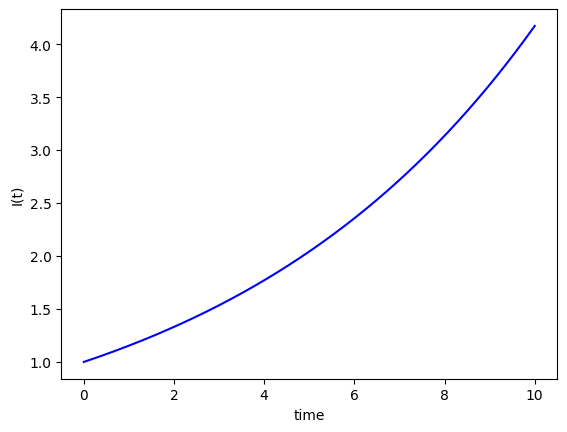

In [4]:
I0 = 1                       # initial condition

n,tmax = 401,10              # n is number of time points
t = np.linspace(0,tmax,n)    # time points

# solve ODE
I = odeint(dIdt,I0,t,args=(1/14,3))

# plot results
plt.plot(t,I,'b-')
plt.ylabel('I(t)')
plt.xlabel('time')
plt.show()

## Example 2: Simple Harmonic Motion

The SHM equation is 

$$\ddot{x}=-\frac{k}{m}x,$$

where $k,m$ are parameters. The problem can be written in the required form by defining $y=\dot{x}$ to give

$$\frac{\mathrm{d}}{\mathrm{d}t}\left(\begin{array}{c}x\\y\end{array}\right)=\left(\begin{array}{c}y\\-kx/m\end{array}\right)$$

We will set up a function that returns this derivative for given values of $X=(x,y)$, and parameters $k,m$.

Notice that we use $X[0],X[1]$ for $x,y$. 

This is because Python indexing starts from zero, so $X[0]$ is the first element obtained from the list $X=(x,y)$.


In [5]:
# Model definition
def dXdt(X,t,k,m):
  dxdt = X[1]          #dx/dt = y
  dydt = -k*X[0]/m     #dy/dt=-k*x/m 
  return [dxdt, dydt]

For example, suppose that the system starts from rest at $x(0)=1$, $\dot{x}(0)=0$.


Taking the constants to be $k=m=1$ gives the following result for $\frac{\mathrm{d}X}{\mathrm{d}t}$ at time $t=0$:

In [6]:
t0,X0 =0,[1,0] #initial conditions for t,x,y
k,m = 1,1
X = dXdt(X0,t0,k,m)
print(X)

[0, -1.0]


Now we will use the function that we created to find a numeric estimate of the solution between $t=0$ and $t=100$. 

The odeint function will return the numeric estimates for $x,y$ at the corresponding time points, as columns in an array. 

We can access the first column by using $X[:,0]$ and the second column by using $X[:,1]$

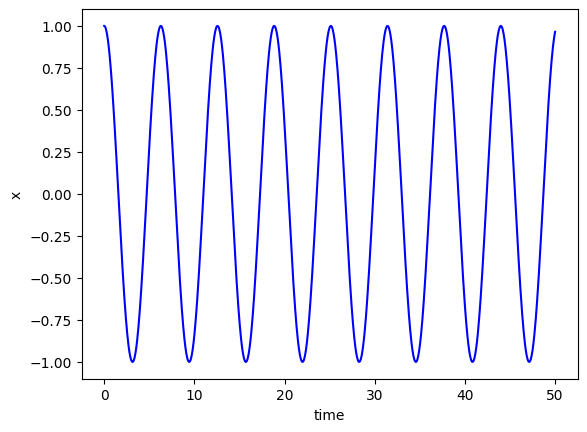

In [7]:
tmax,n=50,1000
t = np.linspace(t0,tmax,n)    # time points

# solve ODE
X = odeint(dXdt,X0,t,args=(k,m))

# plot results
plt.plot(t,X[:,0],'b')
plt.ylabel('x')
plt.xlabel('time')
plt.show()

## Example 3: SHM with forcing

Now let's see what happens if we add in a forcing term 

$$\ddot{x}-\frac{k}{m}x=F\sin(\Omega t),$$ 

where $F=1$, and $\Omega=1.1$ :

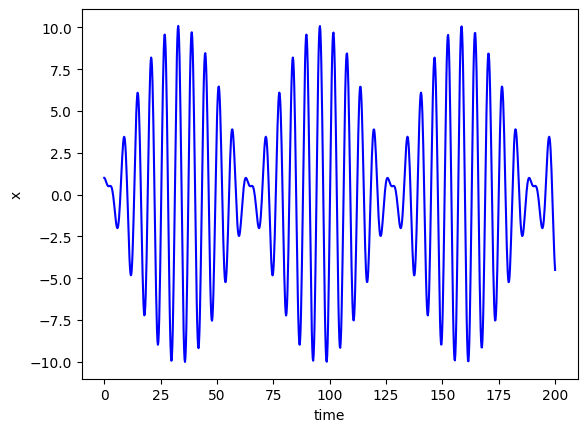

In [8]:
# Re-define the model to include the forcing term
def dXdt(X,t,k,m,F,W):
  dxdt = X[1]                          #dx/dt = y
  dydt = -k*X[0]/m + F*np.sin(W*t)     #dy/dt=-k*x/m + F*sin(W*t)
  return [dxdt, dydt]

t0,X0 =0,[1,0] #initial conditions for t,x,y
k,m,F,W = 1,1,1,1.1

tmax,n=200,1000
t = np.linspace(t0,tmax,n)    # time points

# solve ODE
X = odeint(dXdt,X0,t,args=(k,m,F,W))

# plot results
plt.plot(t,X[:,0],'b')
plt.ylabel('x')
plt.xlabel('time')
plt.show()

Experiment with making $\Omega$ closer to $1$. What happens?

## Example 4 : The SIR model of infection

In this model, $S$ represents people who are susceptible to catching an infection, $I$ represents people who already have the infection, and $R$ represents people who have recovered.

\begin{align*}
\frac{\mathrm{d}S}{\mathrm{d}t}&=-\beta \frac{S I}{N}\\
\frac{\mathrm{d}I}{\mathrm{d}t}&=\beta \frac{S I}{N}-\mu I\\
\frac{\mathrm{d}R}{\mathrm{d}t}&=\mu I
\end{align*}

We will solve the model between $t=0$ to $t=140$, taking $\mu=1/14$, $\beta=3/14$, $N=100$.

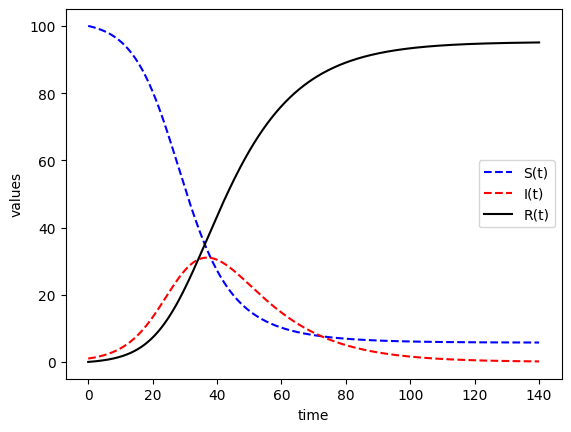

In [9]:
# Model definition
def dXdt(X,t,mu,beta,N):
  dSdt= -beta*X[0]*X[1]/N
  dIdt= beta*X[0]*X[1]/N - mu*X[1]
  dRdt= mu*X[1]
  return [dSdt,dIdt,dRdt]

pop = 100       # population size
X0 = [pop,1,0]  # initial condition

# solve ODE
tmax,n = 140,401
t = np.linspace(0,tmax,n)
X = odeint(dXdt,X0,t,args=(1/14,3/14,pop))

# plot results
plt.plot(t,X[:,0],'b--',label='S(t)')
plt.plot(t,X[:,1],'r--',label='I(t)')
plt.plot(t,X[:,2],'k',label='R(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()